<a href="https://colab.research.google.com/github/MildredJmz1/Applied-Computing/blob/main/Q1_Exam_AppliedComputing_MGJR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mildred Jiménez (A01631207)

## **QUESTION 1**

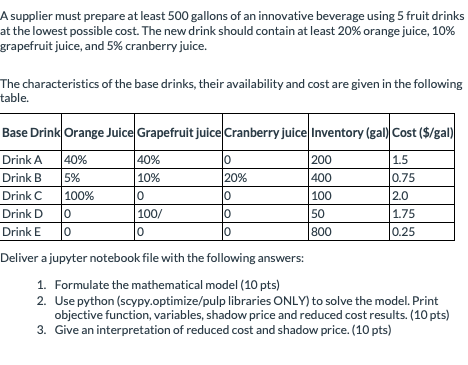

Before attempting to solve the problem, the required libraries need to be imported. In this case, pandas and pulp will be used.

In [1]:
import pandas as pd
!pip install pulp
from pulp import *

     |████████████████████████████████| 40.6MB 110kB/s 


The first step to solve the optimization problem is to establish its type. In this case, after taking into account the characteristics of the provided information, it was determined that this is a Linear  Optimization problem. It was also established that a minimization approach needs to be carried out since the objective is to minimize the production costs of the new beverage, while achieving a minimun production of 500 gallons of the new beverage. 

In [2]:
# Instantiate our problem class
model = LpProblem("Cost_Efficient_NewJuice", LpMinimize)

The variables of the problem were defined as the amount of gallons needed from each drink to prepare the new beverage formulation: 

In [3]:
#Define Decision Variables

a = LpVariable('a',0, None) # number of gallons needed from drink A
b = LpVariable('b',0, None) # number of gallons needed from drink B
c = LpVariable('c',0, None) # number of gallons needed from drink C
d = LpVariable('d',0, None) # number of gallons needed from drink D
e = LpVariable('e',0, None) # number of gallons needed from drink E

The model was defined in terms of the costs ($/gal) required to produce the new beverage. 

In [4]:
#Define the Objectve Function:

model += 1.5*a + 0.75*b + 2*c + 1.75*d + 0.25*e

After defining the objective function of the model, the second step was to determine its constraints. Different constraints were established, including: (1) the minimun number of gallons of the new drink that need to be produced; (2) the minimum required amount of orange juice, grapefruit juice, and cranberry juice that the new beverage should have; and, (3) the amount of gallons available in the inventary for drinks A,B,C,D & E. 

In [5]:
## Define constraints

model += a + b + c + d + e >= 500 #(total gallons that AT LEAST need to be produced)
model += 0.4*a + 0.05*b + c >= 100 #the drink should contain at least 20% orange juice 500*0.2=100
model += 0.4*a + 0.1*b + d >= 50 #the drink should contain at least 10% grapefruit juice 500*0.1=50
model += 0.2*b >= 25 # #the drink should contain at least 5% cranberry juice 500*0.05=25

#constraints of inventory for each type of available drink. The positivity constrain was included in this step as well. 
model += 0 <= a <= 200
model += 0 <= b <= 400
model += 0 <= c <= 100
model += 0 <= d <= 50
model += 0 <= e <= 800


Afterwards, the model was solved and the optimal amount of gallons of each type of existing drink was obtained. 

In [6]:
model.solve()
LpStatus[model.status]

'Optimal'

The different amounts of drinks A, B, C, D and E needed to produce the new beverage while complying with the established requirements is shown below. It can also be observed that drink D will not be used in the new formulation.

In [7]:
print("Use {} gallons of drink A".format(a.varValue))
print("Use {} gallons of drink B".format(b.varValue))
print("Use {} gallons of drink C".format(c.varValue))
print("Use {} gallons of drink D".format(d.varValue))
print("Use {} gallons of drink E".format(e.varValue))
print(value(model.objective))

Use 93.75 gallons of drink A
Use 125.0 gallons of drink B
Use 56.25 gallons of drink C
Use 0.0 gallons of drink D
Use 225.0 gallons of drink E
403.125


The Reduced Cost and the Shadow price were also obtained. In a cost-minimization problem, the coefficients represent the unit costs of the respective variable, in this case the number of gallons of each drink. Thefore, the "Reduced Cost" value indicates us how much should each of these coeffientes (costs) be reduced before the activity represented by its variable is cost-effective. In this case, the only one that would need to be reduced in terms of costs is d, which corresponds to drink D (100% grapefruit juice). This makes sense since even the optimal model did not indicate a value for this variable, meaning it is not cost effective yet to use it to prepare the new beverage. On the other hand, the "Shadow Price" value is directly associated with the constraints of the model. This value tells us how much the cost can be reduced when one unit of the respective resource is increased. In this case, as observed from _C1 to _C4, some costs can be reduced if there is an increase in the amount of gallons of the new beverage that will be produed, but mainly if more orange juice is used for its production, followed by the cranberry and grapefruit juices. This behaviour results logical as generally, in any production process, the increase of unit productions lead to lowering their unit production costs. 

In [8]:
for v in model.variables():
    print (v.name, "=", v.varValue, "\tReduced Cost =", v.dj)

o = [{'name':name, 'ShadowPrice':c.pi, 'tSlack':c.slack} for name, c in model.constraints.items()]
print(pd.DataFrame(o))

a = 93.75 	Reduced Cost = 0.0
b = 125.0 	Reduced Cost = 0.0
c = 56.25 	Reduced Cost = 0.0
d = 0.0 	Reduced Cost = 0.125
e = 225.0 	Reduced Cost = 0.0
  name  ShadowPrice  tSlack
0  _C1        0.250   -0.00
1  _C2        1.750   -0.00
2  _C3        1.375   -0.00
3  _C4        1.375   -0.00
4  _C5        0.000  106.25
5  _C6        0.000  275.00
6  _C7        0.000   43.75
7  _C8        0.000   50.00
8  _C9        0.000  575.00
